Heart Disease Prediction - EDA
The EDA and Data wrangling section of mt Time Series work about Gasoline Price Forecasting has already been presented in the previous chapter. Instead of submitting the same work in this chapter, I decided to work on this small project about Heart Disease just to apply EDA techniques and explore a new dataset on classification.

In [1]:
# importing all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
HeartDisease = r"C:\Users\Emine\OneDrive\Masaüstü\Data Science\Ch 7 - Second Capstone\Heart Disease\HeartDisease.csv"

In [3]:
data= pd.read_csv(HeartDisease)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
#Dataset does not have any missing data
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

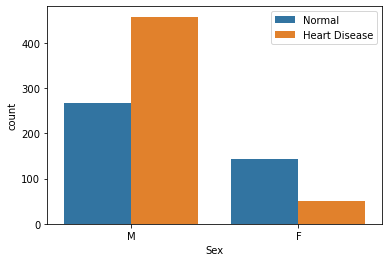

In [42]:
#visualizing the data
sns.countplot(x="Sex", data=data, hue="HeartDisease")
plt.legend(['Normal', 'Heart Disease'])
plt.show()

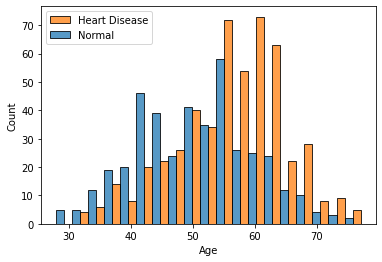

In [40]:
sns.histplot(x="Age", data=data, hue="HeartDisease", multiple='dodge')
plt.legend(['Heart Disease', 'Normal'])
plt.show()

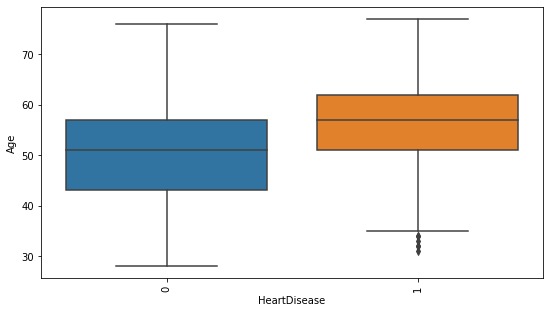

In [20]:
plt.figure(figsize=(10,5))
_ = sns.boxplot(x='HeartDisease', y='Age', data=data)
_ = plt.xlabel('HeartDisease')
_ = plt.ylabel('Age')
_=plt.xticks(rotation = 90)
plt.show()

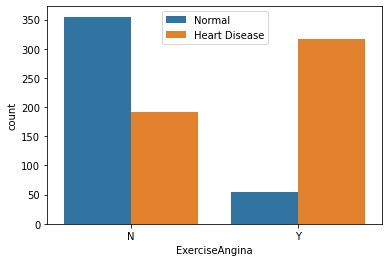

In [38]:
sns.countplot(x="ExerciseAngina", data=data, hue="HeartDisease")
plt.legend(['Normal', 'Heart Disease'])
plt.show()

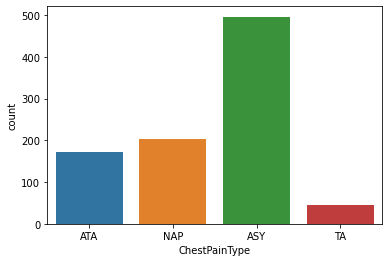

In [16]:
sns.countplot(x="ChestPainType", data=data)
plt.show()

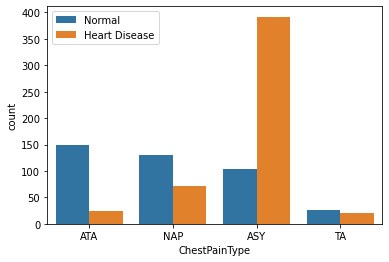

In [43]:
sns.countplot(x="ChestPainType", data=data, hue="HeartDisease")
plt.legend(['Normal', 'Heart Disease'])
plt.show()

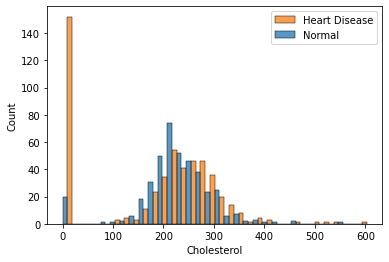

In [45]:
sns.histplot(x="Cholesterol", data=data, hue="HeartDisease", multiple='dodge')
plt.legend(['Heart Disease', 'Normal'])
plt.show()

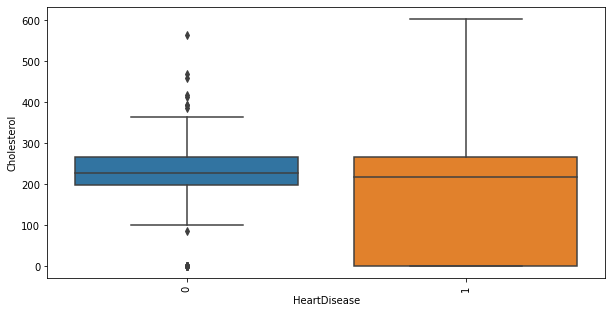

In [22]:
plt.figure(figsize=(10,5))
_ = sns.boxplot(x='HeartDisease', y='Cholesterol',data=data)
_ = plt.xlabel('HeartDisease')
_ = plt.ylabel('Cholesterol')
_=plt.xticks(rotation = 90)
plt.show()

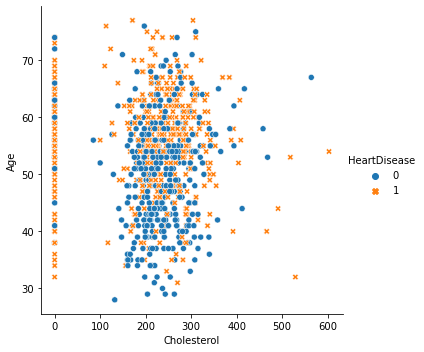

In [28]:
sns.relplot(x="Cholesterol", y="Age", data=data, kind="scatter", hue='HeartDisease', style= 'HeartDisease')
plt.show()

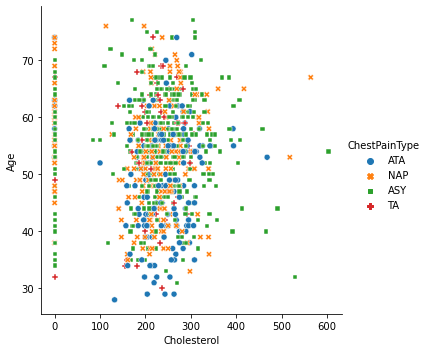

In [18]:
sns.relplot(x="Cholesterol", y="Age", data=data, kind="scatter", hue='ChestPainType', style= 'ChestPainType')
plt.show()


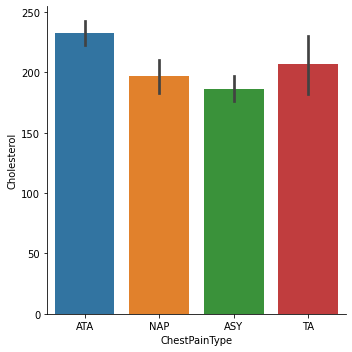

In [19]:
sns.catplot(x="ChestPainType", y="Cholesterol", data=data, kind="bar")
plt.show()

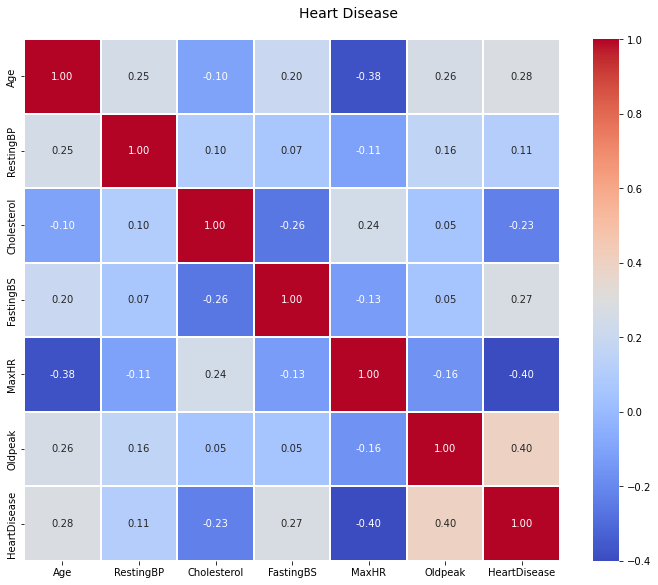

In [23]:
# checking the correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart Disease', fontsize=14)

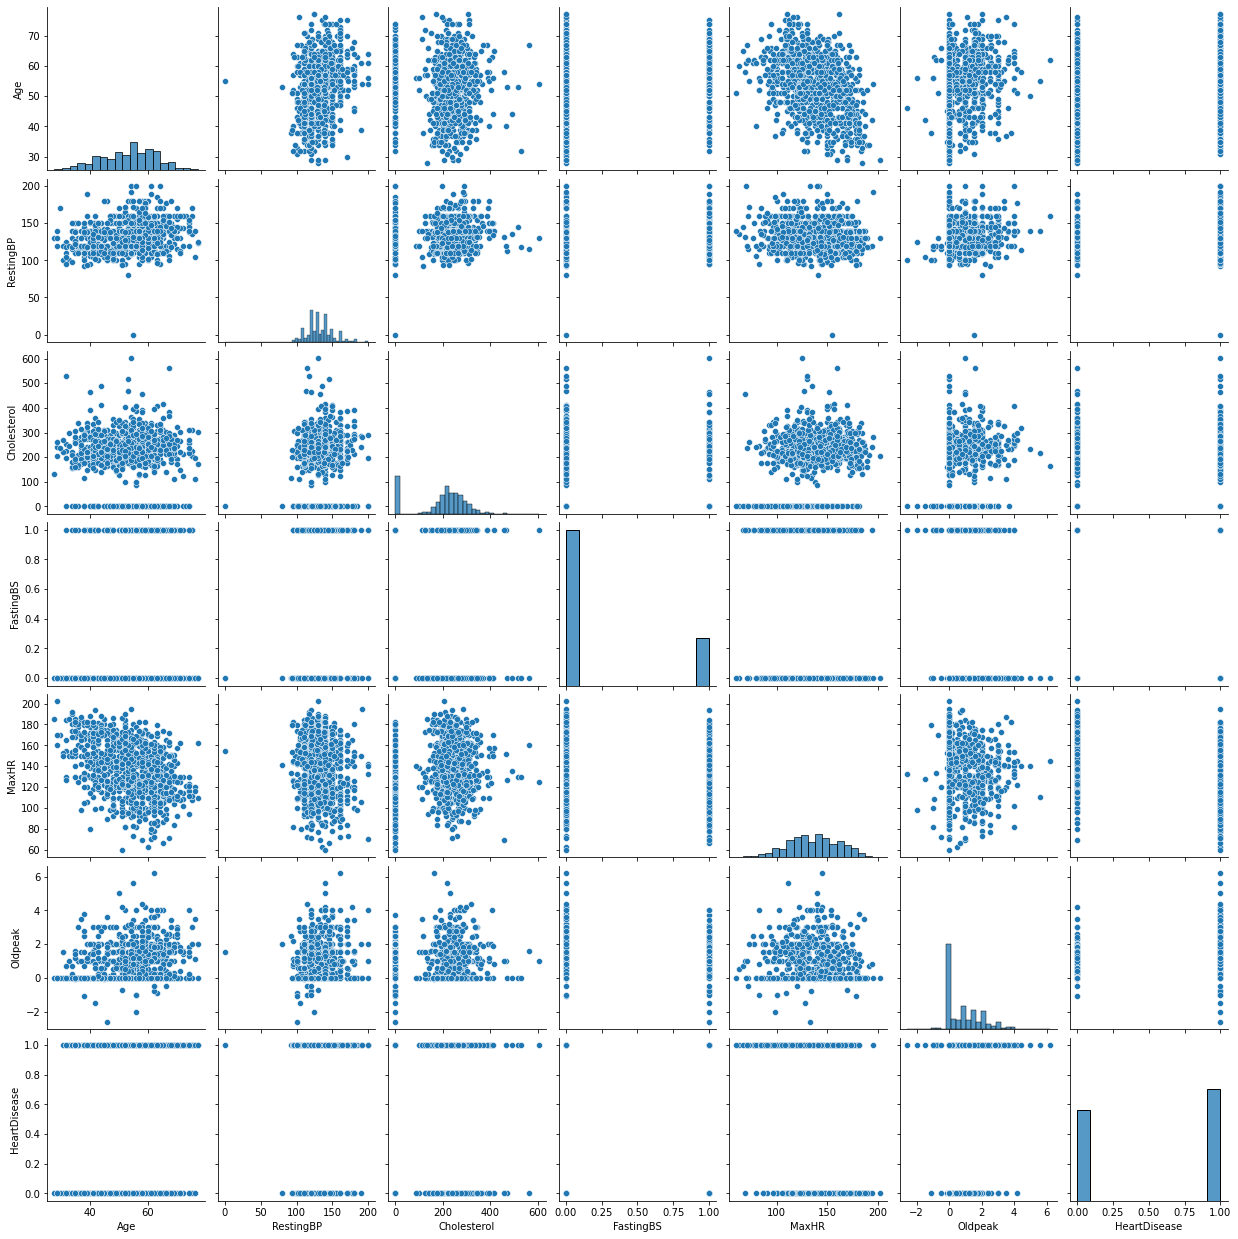

In [24]:
sns.pairplot(data,  palette='Set1')
plt.show()

Findings:
According to the descriptive statistics;
- A greater proportion of male patients have heart disease than female patients. 
- In terms of the age distribution, as expected, heart disease is more common among the older patients. 
- More patients who experience exercise-induced angina have heart disease than those who did not experience any angina. 
- Greater proportion of older patients who have high colesterol have heart disease than younger patients. 
- Greater proportion of the patients have Asymptomatic chest pain. greater proportion of the patents who have asymptotic chest pain have heart disease.
- Atypical angina is more common among the patients who have high cholesterol.

- The correlation matrix indicates that there is no strong correlation between any of the variables and heart disease. In addition to that the following notable relationships between variables:

    Moderately Strong Correlations:
    OldPeak and Heat Disease ==> (.40)
    MaxHR and Heart Disease ==> (-.40)
    
- There is no detected outlier and missing data in the dataset.